In [1]:
from Functions import *

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression as LogReg

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from lazypredict.Supervised import LazyRegressor

In [3]:
data = pd.read_csv(r"C:\Users\pabli\Desktop\Health-Database\data\Df_modeling\data_0.csv")

In [4]:
data.drop(columns="Unnamed: 0",inplace=True)

In [5]:
data

,Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years),per_capita-Lower Respiratory Infections,per_capita-Malaria,Maternal mortality ratio (per 100 000 live births),per_capita-Protein-Energy Malnutrition,Mean hemoglobin level of children aged 6-59 months,per_capita-Meningitis
0,9.59,0.00,0.00,1300.00,0.00,108.00,0.00
1,9.42,0.00,0.00,1240.00,0.00,109.00,0.00
2,9.42,0.00,0.00,1180.00,0.00,109.00,0.00
3,9.56,0.00,0.00,1140.00,0.00,110.00,0.00
4,9.78,0.00,0.00,1120.00,0.00,110.00,0.00
...,...,...,...,...,...,...,...
3073,13.28,0.00,0.00,480.00,0.00,112.00,0.00
3074,12.89,0.00,0.00,468.00,0.00,112.00,0.00
3075,12.52,0.00,0.00,458.00,0.00,113.00,0.00
3076,12.19,0.00,0.00,592.06,0.00,113.00,0.00


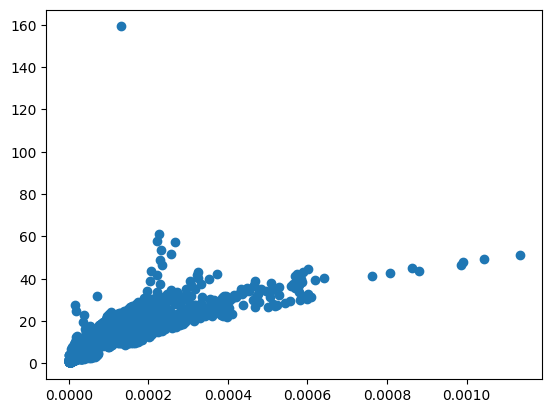

In [6]:
x = data["per_capita-Meningitis"]
y = data["Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)"]
plt.scatter(x, y)

plt.show()

In [7]:
data.corr()

,Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years),per_capita-Lower Respiratory Infections,per_capita-Malaria,Maternal mortality ratio (per 100 000 live births),per_capita-Protein-Energy Malnutrition,Mean hemoglobin level of children aged 6-59 months,per_capita-Meningitis
Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years),1.00,0.77,0.77,0.82,0.74,-0.83,0.86
per_capita-Lower Respiratory Infections,0.77,1.00,0.69,0.81,0.72,-0.75,0.83
per_capita-Malaria,0.77,0.69,1.00,0.71,0.65,-0.75,0.83
Maternal mortality ratio (per 100 000 live births),0.82,0.81,0.71,1.00,0.70,-0.81,0.81
per_capita-Protein-Energy Malnutrition,0.74,0.72,0.65,0.70,1.00,-0.67,0.78
Mean hemoglobin level of children aged 6-59 months,-0.83,-0.75,-0.75,-0.81,-0.67,1.00,-0.81
per_capita-Meningitis,0.86,0.83,0.83,0.81,0.78,-0.81,1.00


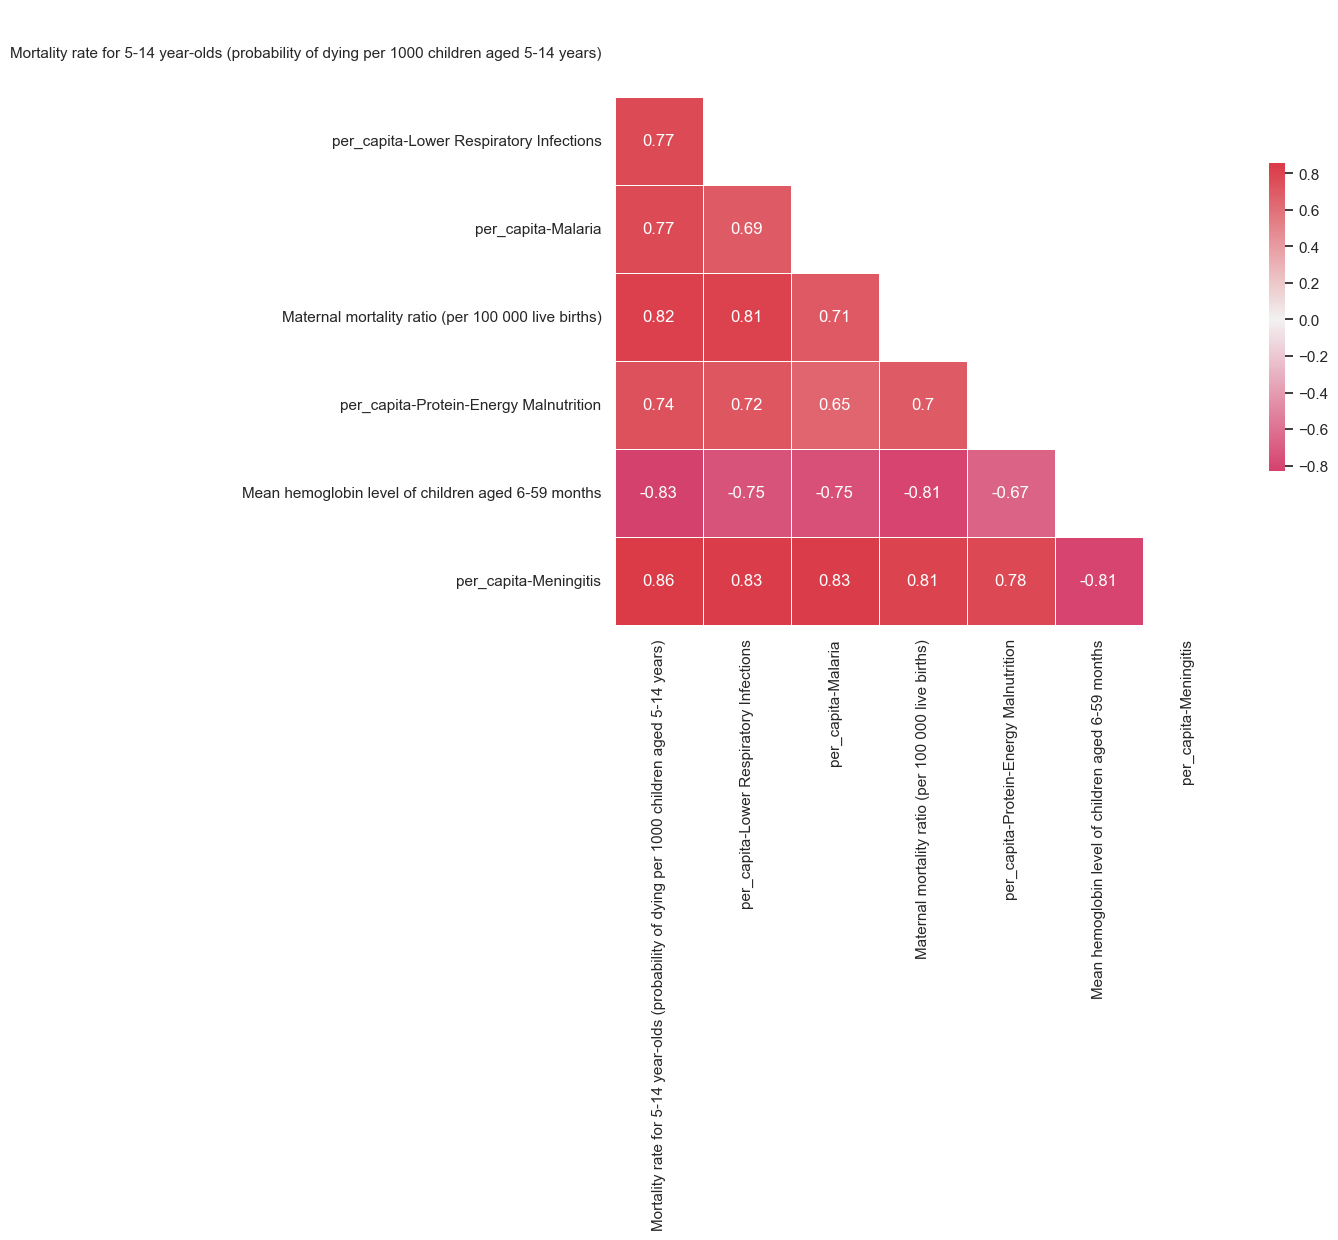

In [8]:

plt.figure(figsize=(10, 8))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [9]:
X = data.drop(columns=["per_capita-Meningitis"])
y = data["per_capita-Meningitis"]
     
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape , X_test.shape

((2462, 6), (616, 6))

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 24%|██▍       | 10/42 [00:02<00:09,  3.46it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 64%|██████▍   | 27/42 [00:07<00:02,  6.14it/s]

In [ ]:
x=sm.add_constant(data.drop(columns=["per_capita-Meningitis"]))

y=data["per_capita-Meningitis"]

modelo=sm.OLS(y, x).fit()

In [ ]:
pred=modelo.predict(x)

modelo.summary()